# Imports

In [61]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score
sys.path.append("../src")

# Constants

In [76]:
train_path = "../data/selected_train.csv"
train_not_norm_path = "../data/train_not_normalized.csv"

# Loading data

In [77]:
take_normalized_data = True

In [78]:
def preprocessing_data(data):
    scaler = StandardScaler()
    scaler.fit(data)
    return scaler.transform(data)

In [79]:
if take_normalized_data:
    # Already preprocessed data
    df_data = pd.read_csv(train_path, sep=",")
    X = df_data[df_data.columns.difference(['label'])].values
    
else:
    # Load data not preprocessed and preprocess it
    df_data = pd.read_csv(train_not_norm_path, sep=",")
    X = df_data[df_data.columns.difference(['label'])].values
    X = preprocessing_data(X)

y = df_data["label"].values

# PCA

In [30]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1','principal component 2'])

In [31]:
finalDf = pd.concat([principalDf, df_data[['label']]], axis = 1)

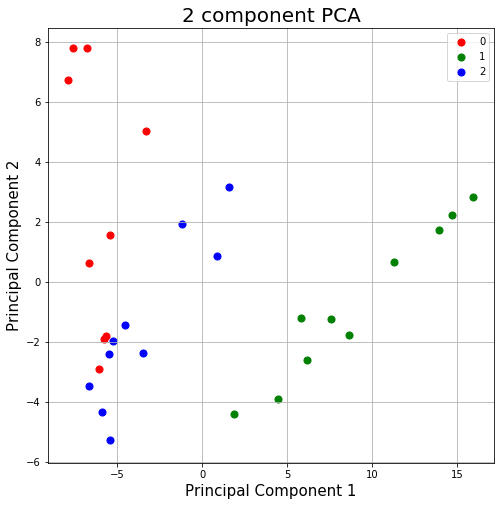

In [32]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep,   'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# KNN

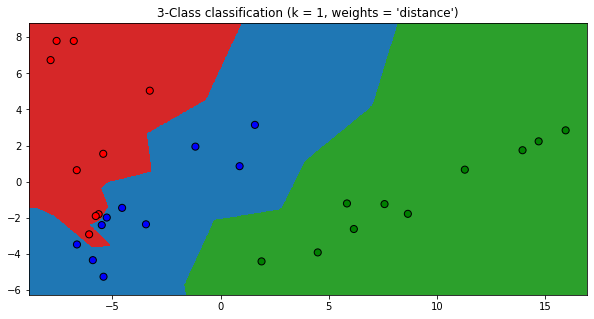

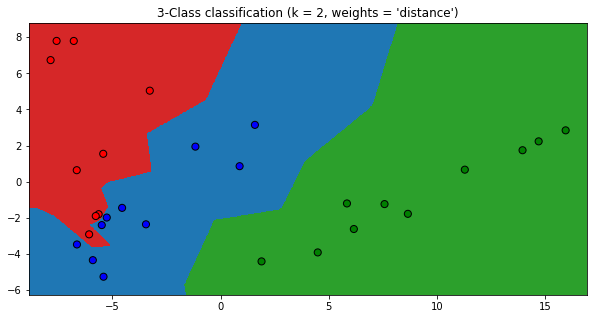

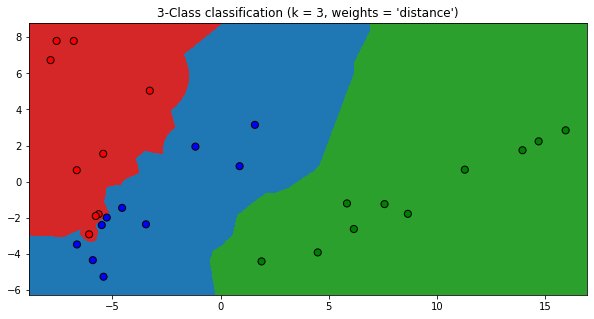

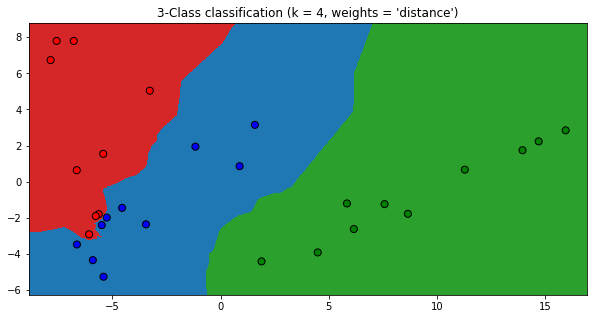

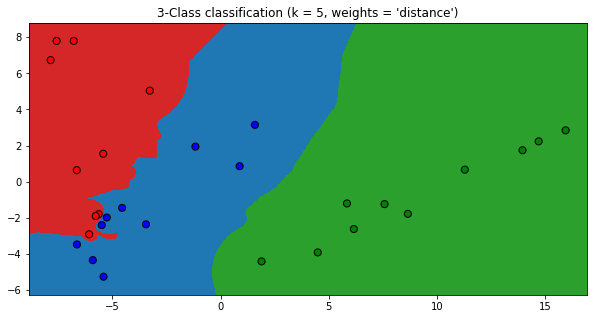

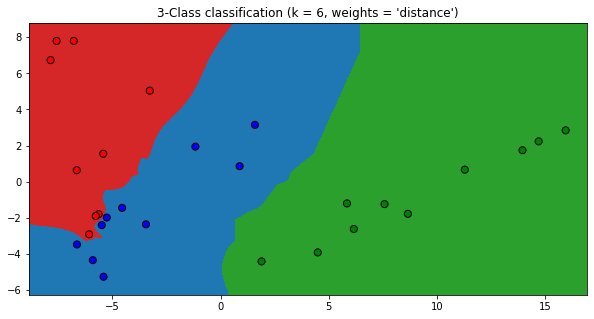

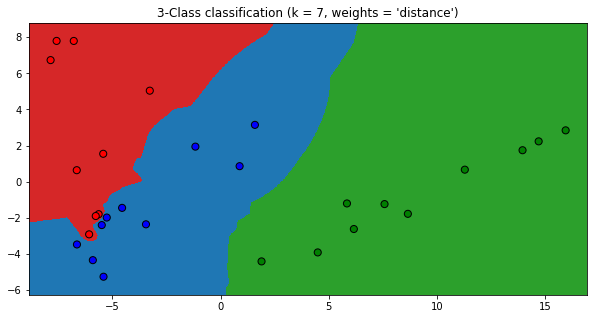

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = finalDf[finalDf.columns.difference(["label"])].values
y = finalDf["label"]

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['C3', 'C2', 'C0'])
cmap_bold  = ListedColormap(['r', 'g', 'b'])

for num_NN in range(1, 8):
    #for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    weights="distance"
    clf = neighbors.KNeighborsClassifier(num_NN, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10, 5))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=50)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (num_NN, weights))

    plt.show()

# Accuracy calculation

Performs KFold for each differents PCA dimensions.

In [86]:
num_splits = 1000

In [87]:
# Dic for results
dic_results = {}

for n_components in range(2, 20):
    #print("\nNum components", n_components)
    for K in range(1, 10):
        acc_tot = 0.0
        for split_num in range(num_splits):
            # Split train test
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

            # PCA on train
            pca = PCA(n_components=n_components)
            pcs_train = pca.fit_transform(X_train)
            pcs_test = pca.transform(X_test)

            # Clf KNN
            clf = neighbors.KNeighborsClassifier(K, weights="distance")
            clf.fit(pcs_train, y_train)

            # Make predictions
            y_preds = clf.predict(pcs_test)
            acc_tot += accuracy_score(y_test, y_preds)

        acc = acc_tot / num_splits
        #print("K={} | Accuracy={}".format(K, acc))
        
        if not K in dic_results:
            dic_results[K] = {"n_components":n_components, "accuracy":acc}
        elif dic_results[K]["accuracy"] < acc:
            dic_results[K] = {"n_components":n_components, "accuracy":acc}

for key, val in dic_results.items():
    print("K={} | {}".format(key, val))

K=1 | {'n_components': 19, 'accuracy': 0.8998333333333374}
K=2 | {'n_components': 19, 'accuracy': 0.9013333333333371}
K=3 | {'n_components': 10, 'accuracy': 0.8733333333333368}
K=4 | {'n_components': 10, 'accuracy': 0.8916666666666704}
K=5 | {'n_components': 16, 'accuracy': 0.8711666666666695}
K=6 | {'n_components': 10, 'accuracy': 0.8691666666666686}
K=7 | {'n_components': 11, 'accuracy': 0.8505000000000014}
K=8 | {'n_components': 4, 'accuracy': 0.831833333333335}
K=9 | {'n_components': 19, 'accuracy': 0.834000000000002}
